In [ ]:
## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [36]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

#### Import the CSV Data as Pandas DataFrame

In [37]:
df = pd.read_csv(r'C:\Users\ISMAIL\OneDrive\Documents\mlproject\notebook\data\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [38]:
# Drop the specified columns
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber']
df.drop(columns=columns_to_drop, inplace=True)

#### Show Top 5 Records

In [39]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [40]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

#### Preparing X and Y variables

In [41]:
# Splitting the data 

# Separate the input features (X) and the target variable (y)
X = df.drop(columns=['Attrition']) # X contains all columns except 'Attrition_Yes'
y = df['Attrition'] # y contains only the 'Attrition_Yes' column, which is the target variable

In [42]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [43]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [44]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [45]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop="first", sparse_output=False)  # Ensure sparse_output=False for compatibility with StandardScaler


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)


In [46]:
X = preprocessor.fit_transform(X)

In [47]:
X.shape

(1470, 44)

In [48]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


X_train.shape, X_test.shape

((1956, 44), (294, 44))

In [49]:
#create column transformer with 3 types

#### Create an Evaluate Function to give all metrics after model Training

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(classifier, X_test, y_test):
    """
    Evaluate the trained classifier on the test data and return evaluation metrics.
    
    Args:
    classifier: Trained classifier object.
    X_test: Test features.
    y_test: True labels for the test data.
    
    Returns:
    Dictionary containing evaluation metrics.
    """
    # Predict on test data
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Store metrics in a dictionary
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Classification Report': report,
        'Confusion Matrix': confusion_mat
    }
    
    return metrics


In [51]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

# Initialize lists to store model names and evaluation metrics
model_list = []
accuracy_list = []
f1_score_list = []
evaluation_metrics = []

# Iterate through the models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model on train dataset
    train_metrics = evaluate_model(model, X_train, y_train)
    
    # Evaluate the model on test dataset
    test_metrics = evaluate_model(model, X_test, y_test)


    # Append accuracy and F1-score to the lists
    accuracy_list.append(test_metrics['Accuracy'])
    f1_score_list.append(test_metrics['F1-score'])
    model_list.append(model_name)

    
    # Print model performance
    print(model_name)
    print("Model performance for Training set")
    for metric, value in train_metrics.items():
        if isinstance(value, (int, float)):
            print(f"- {metric}: {value:.4f}")
        else:
            print(f"- {metric}: {value}")
    print("----------------------------------")
    print("Model performance for Test set")
    for metric, value in test_metrics.items():
        if isinstance(value, (int, float)):
            print(f"- {metric}: {value:.4f}")
        else:
            print(f"- {metric}: {value}")
    print("===================================")


Logistic Regression
Model performance for Training set
- Accuracy: 0.8175
- Precision: 0.8183
- Recall: 0.8175
- F1-score: 0.8174
- Classification Report:               precision    recall  f1-score   support

          No       0.83      0.79      0.81       978
         Yes       0.80      0.84      0.82       978

    accuracy                           0.82      1956
   macro avg       0.82      0.82      0.82      1956
weighted avg       0.82      0.82      0.82      1956

- Confusion Matrix: [[775 203]
 [154 824]]
----------------------------------
Model performance for Test set
- Accuracy: 0.7347
- Precision: 0.8284
- Recall: 0.7347
- F1-score: 0.7692
- Classification Report:               precision    recall  f1-score   support

          No       0.92      0.76      0.83       255
         Yes       0.26      0.54      0.35        39

    accuracy                           0.73       294
   macro avg       0.59      0.65      0.59       294
weighted avg       0.83      0.73    

c:\Users\ISMAIL\OneDrive\Documents\mlproject\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.9300
- Precision: 0.9302
- Recall: 0.9300
- F1-score: 0.9299
- Classification Report:               precision    recall  f1-score   support

          No       0.92      0.94      0.93       978
         Yes       0.94      0.92      0.93       978

    accuracy                           0.93      1956
   macro avg       0.93      0.93      0.93      1956
weighted avg       0.93      0.93      0.93      1956

- Confusion Matrix: [[921  57]
 [ 80 898]]
----------------------------------
Model performance for Test set
- Accuracy: 0.8605
- Precision: 0.8651
- Recall: 0.8605
- F1-score: 0.8627
- Classification Report:               precision    recall  f1-score   support

          No       0.92      0.91      0.92       255
         Yes       0.48      0.51      0.49        39

    accuracy                           0.86       294
   macro avg       0.70      0.71      0.71       294
weighted avg       0.87      0.86    

In [52]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(list(zip(model_list, accuracy_list, f1_score_list)), columns=['Model Name', 'Accuracy', 'F1-score'])

# Sort the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by=["Accuracy"], ascending=False)

# Print the results
print(results_df)

                     Model Name  Accuracy  F1-score
3           CatBoost Classifier  0.897959  0.877576
2  Gradient Boosting Classifier  0.887755  0.871698
1      Random Forest Classifier  0.863946  0.836769
4           AdaBoost Classifier  0.860544  0.862714
0           Logistic Regression  0.734694  0.769218


### Results

In [53]:
# Convert DataFrame to a list of dictionaries
results_list = results_df.to_dict(orient='records')

# Print the list of dictionaries
print(results_list)

[{'Model Name': 'CatBoost Classifier', 'Accuracy': 0.8979591836734694, 'F1-score': 0.8775764987642998}, {'Model Name': 'Gradient Boosting Classifier', 'Accuracy': 0.8877551020408163, 'F1-score': 0.8716975111469726}, {'Model Name': 'Random Forest Classifier', 'Accuracy': 0.8639455782312925, 'F1-score': 0.8367686650190663}, {'Model Name': 'AdaBoost Classifier', 'Accuracy': 0.8605442176870748, 'F1-score': 0.8627141411024196}, {'Model Name': 'Logistic Regression', 'Accuracy': 0.7346938775510204, 'F1-score': 0.76921768707483}]


In [54]:
# Instantiate CatBoost Classifier
catboost_model = CatBoostClassifier(verbose=False)

# Train the CatBoost Classifier
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
evaluation_metrics = evaluate_model(catboost_model, X_test, y_test)

# Print the evaluation metrics
print(evaluation_metrics)


{'Accuracy': 0.8979591836734694, 'Precision': 0.8895325872284396, 'Recall': 0.8979591836734694, 'F1-score': 0.8775764987642998, 'Classification Report': '              precision    recall  f1-score   support\n\n          No       0.90      0.99      0.94       255\n         Yes       0.80      0.31      0.44        39\n\n    accuracy                           0.90       294\n   macro avg       0.85      0.65      0.69       294\nweighted avg       0.89      0.90      0.88       294\n', 'Confusion Matrix': array([[252,   3],
       [ 27,  12]], dtype=int64)}


## Plot y_pred and y_test

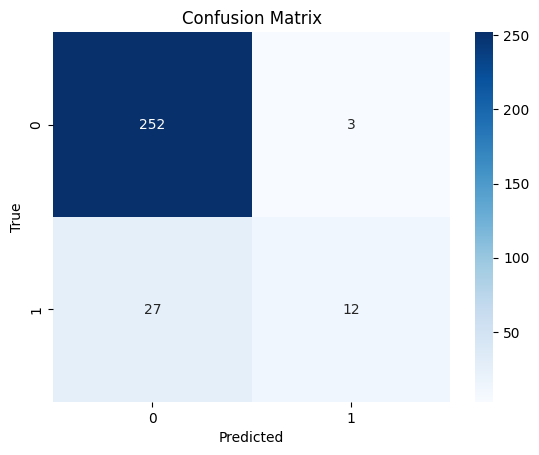

In [55]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [56]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[252   3]
 [ 27  12]]
